# Diabetes Diagnostics 

In [1]:
#importing importnat libraries
import pandas as pd
from pandas import Series, DataFrame, Panel
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import plotly.express as px
import plotly.offline as py

C:\Users\sawan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
#Importing tensorflow and keras to formulate our Neural Network 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
#Data input 
df = pd.read_csv('diabetes.csv')

# Descriptive analysis

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

# Exploratory Data Analysis 

Text(0.5, 1.0, 'Age Distribution - Diabetic V.S. Diabetic')

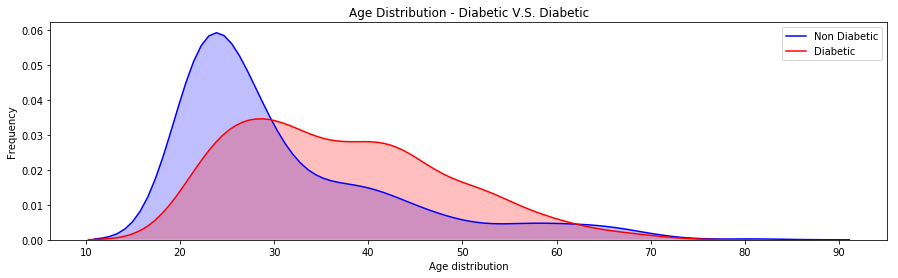

In [8]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'Age'] , color='b',shade=True, label='Non Diabetic')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'Age'] , color='r',shade=True, label='Diabetic')
ax.set(xlabel='Age distribution', ylabel='Frequency')
plt.title('Age Distribution - Diabetic V.S. Diabetic')

Text(0.5, 1.0, 'BMI Distribution - Diabetic V.S. Diabetic')

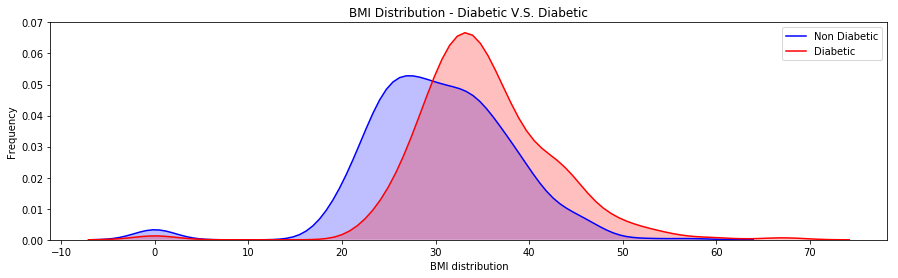

In [9]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'BMI'] , color='b',shade=True, label='Non Diabetic')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'BMI'] , color='r',shade=True, label='Diabetic')
ax.set(xlabel='BMI distribution', ylabel='Frequency')
plt.title('BMI Distribution - Diabetic V.S. Diabetic')

Text(0.5, 1.0, 'Glucose Distribution - Diabetic V.S. Diabetic')

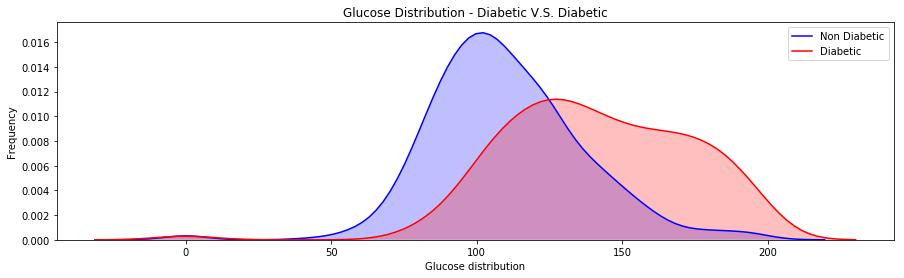

In [10]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'Glucose'] , color='b',shade=True, label='Non Diabetic')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'Glucose'] , color='r',shade=True, label='Diabetic')
ax.set(xlabel='Glucose distribution', ylabel='Frequency')
plt.title('Glucose Distribution - Diabetic V.S. Diabetic')

Text(0.5, 1.0, 'Diabetes Pedigree Function Distribution - Diabetic V.S. Diabetic')

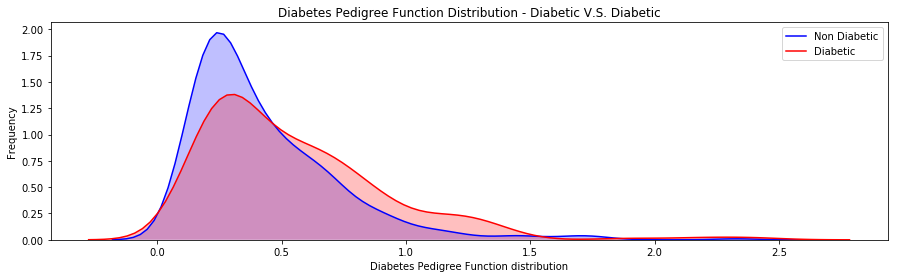

In [11]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Outcome'] == 0),'DiabetesPedigreeFunction'] , color='b',shade=True, label='Non Diabetic')
ax=sns.kdeplot(df.loc[(df['Outcome'] == 1),'DiabetesPedigreeFunction'] , color='r',shade=True, label='Diabetic')
ax.set(xlabel='Diabetes Pedigree Function distribution', ylabel='Frequency')
plt.title('Diabetes Pedigree Function Distribution - Diabetic V.S. Diabetic')

[Text(0, 0.5, 'Percent')]

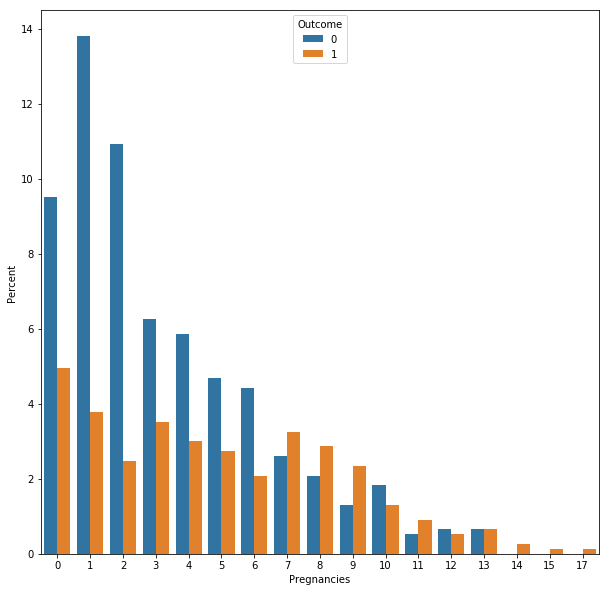

In [12]:
# Checking for association between number of pregnancies and chances of being Diabetic 
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Pregnancies", y="Pregnancies", hue="Outcome", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

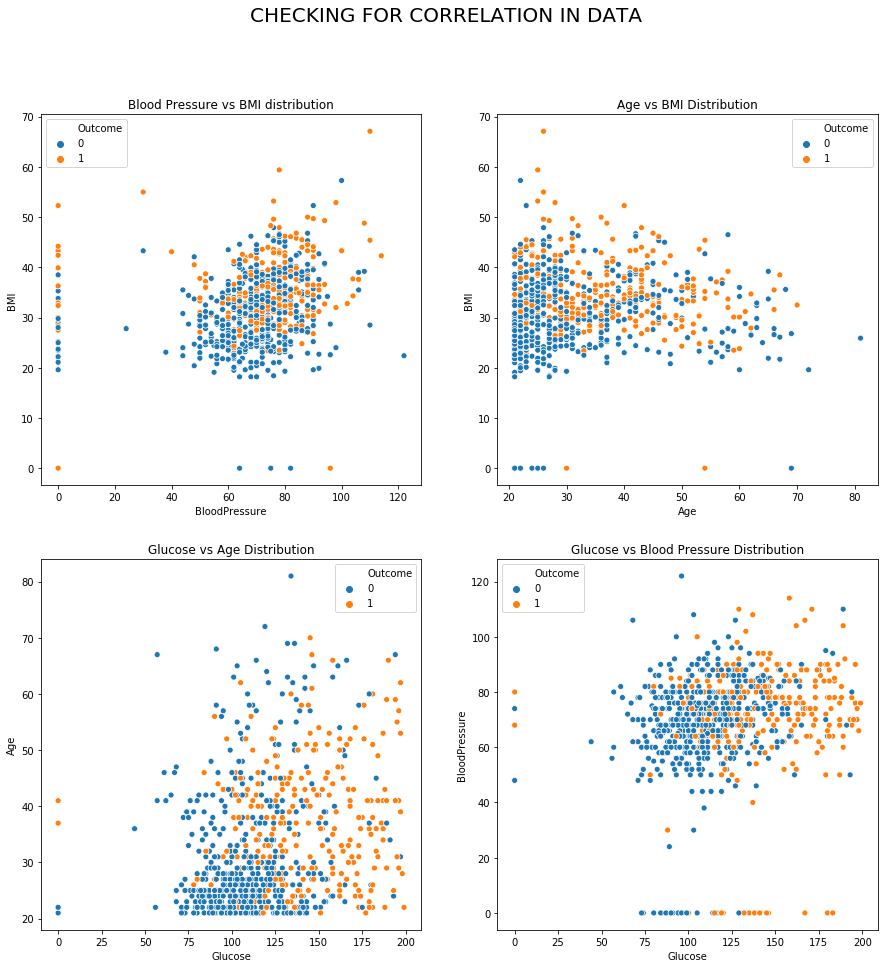

In [13]:
#Checking for Correlation between the features
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
ax1 = sns.scatterplot(x='BloodPressure', y='BMI', data=df, hue='Outcome')
plt.title("Blood Pressure vs BMI distribution")

plt.subplot(222)
ax2 = sns.scatterplot(x='Age', y='BMI', data=df, hue='Outcome')
plt.title('Age vs BMI Distribution')

plt.subplot(223)
ax3 = sns.scatterplot(x='Glucose', y='Age', data=df, hue='Outcome')
plt.title('Glucose vs Age Distribution')

plt.subplot(224)
ax4 = sns.scatterplot(x='Glucose', y='BloodPressure', data=df, hue='Outcome')
plt.title('Glucose vs Blood Pressure Distribution')

fig.suptitle('CHECKING FOR CORRELATION IN DATA', fontsize = 20)
plt.show()

# Data Cleaning

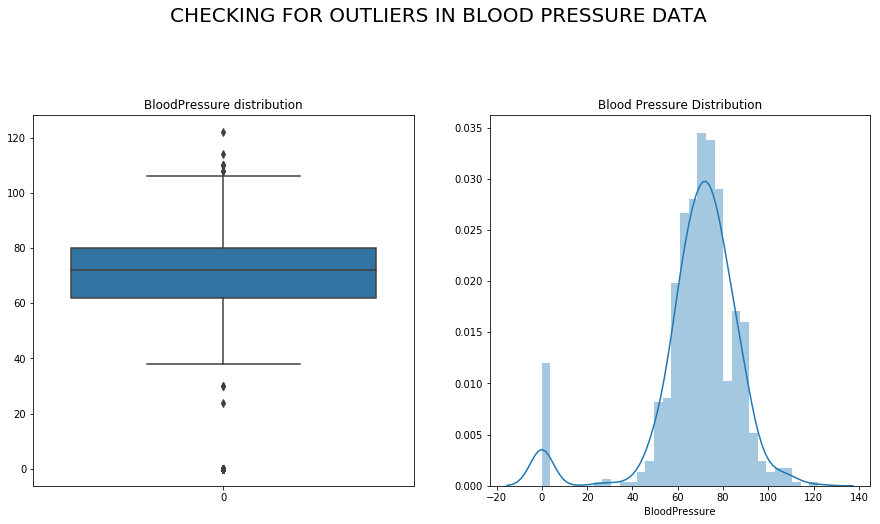

In [14]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
ax1 = sns.boxplot(data=df.BloodPressure)
plt.title("BloodPressure distribution")

plt.subplot(222)
ax2 = sns.distplot(df.BloodPressure)
plt.title('Blood Pressure Distribution')

fig.suptitle('CHECKING FOR OUTLIERS IN BLOOD PRESSURE DATA', fontsize = 20)
plt.show()

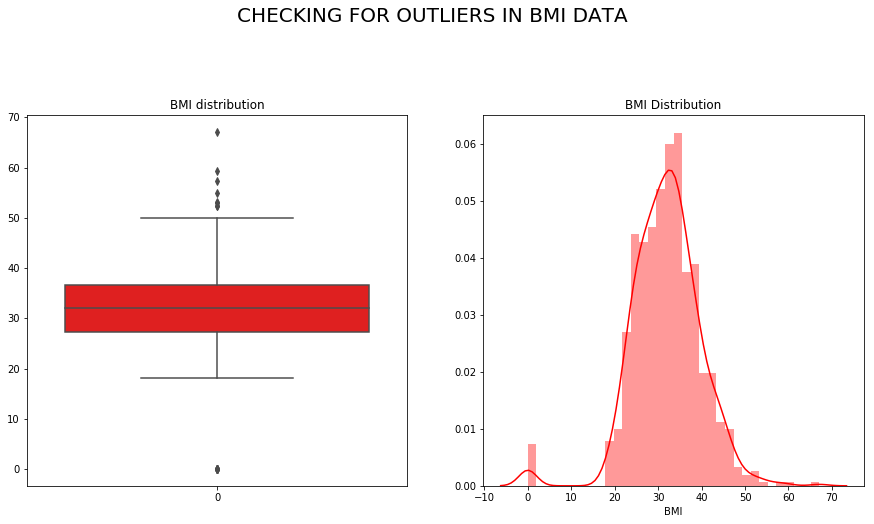

In [15]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
ax1 = sns.boxplot(data=df.BMI, color = "red")
plt.title("BMI distribution")

plt.subplot(222)
ax2 = sns.distplot(df.BMI, color = "red")
plt.title('BMI Distribution')

fig.suptitle('CHECKING FOR OUTLIERS IN BMI DATA', fontsize = 20)
plt.show()

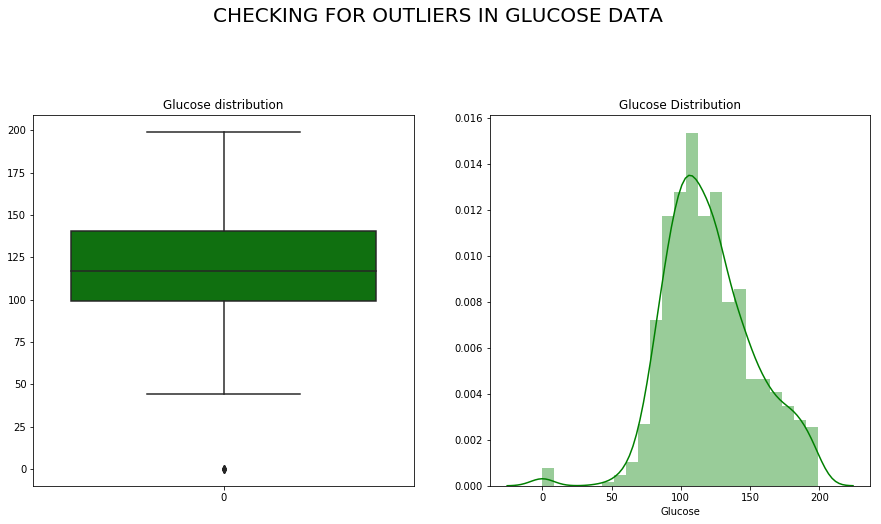

In [16]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
ax1 = sns.boxplot(data=df.Glucose, color = "green")
plt.title("Glucose distribution")

plt.subplot(222)
ax2 = sns.distplot(df.Glucose, color = "GREEN")
plt.title('Glucose Distribution')

fig.suptitle('CHECKING FOR OUTLIERS IN GLUCOSE DATA', fontsize = 20)
plt.show()

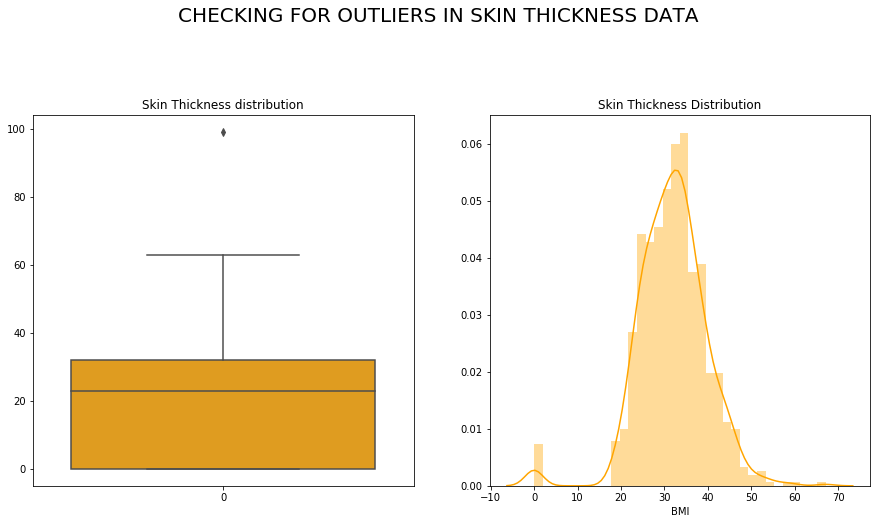

In [17]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
ax1 = sns.boxplot(data=df.SkinThickness, color = "orange")
plt.title("Skin Thickness distribution")

plt.subplot(222)
ax2 = sns.distplot(df.BMI, color = "Orange")
plt.title('Skin Thickness Distribution')

fig.suptitle('CHECKING FOR OUTLIERS IN SKIN THICKNESS DATA', fontsize = 20)
plt.show()

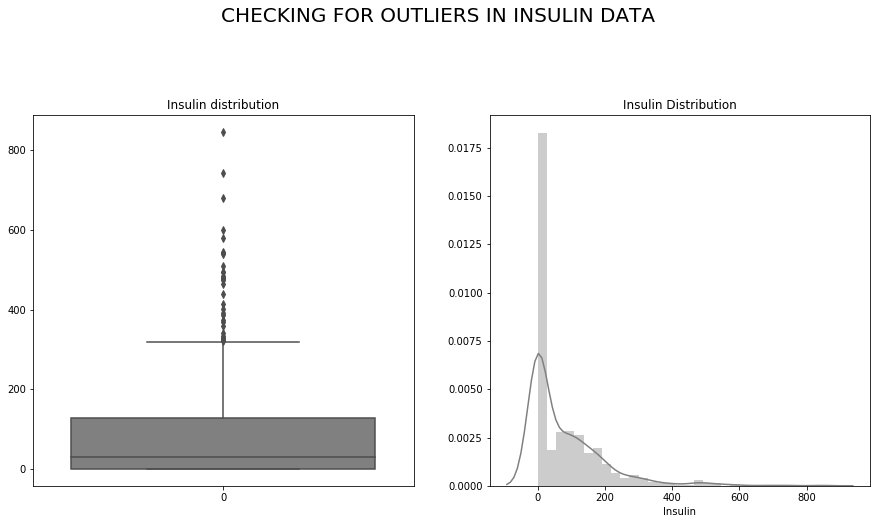

In [18]:
fig = plt.figure(figsize=(15,15))
plt.subplot(221)
ax1 = sns.boxplot(data=df.Insulin, color = "Grey")
plt.title("Insulin distribution")

plt.subplot(222)
ax2 = sns.distplot(df.Insulin, color = "Grey")
plt.title('Insulin Distribution')

fig.suptitle('CHECKING FOR OUTLIERS IN INSULIN DATA', fontsize = 20)
plt.show()

In [19]:
#Removing Outliers from the data 
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.BMI = df.BMI.replace(0,df.BMI.median())
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.Insulin = df.Insulin.replace(0,df.Insulin.median())

In [20]:
# Create a correlation matrix.
corr = df.corr()
corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127964       0.208615       0.013376   
Glucose                      0.127964  1.000000       0.218623       0.160766   
BloodPressure                0.208615  0.218623       1.000000       0.127874   
SkinThickness                0.013376  0.160766       0.127874       1.000000   
Insulin                     -0.055697  0.357081      -0.028721       0.274253   
BMI                          0.021546  0.231469       0.281132       0.535695   
DiabetesPedigreeFunction    -0.033523  0.137106      -0.002378       0.154961   
Age                          0.544341  0.266600       0.324915       0.026423   
Outcome                      0.221898  0.492908       0.165723       0.175026   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.055697  0.021546                 -0.033523   
Glucose                   0.357081  0.231469                  0.137106   
BloodPressure            -0.028721  0.281132                 -0.002378   
SkinThickness             0.274253  0.535695                  0.154961   
Insulin                   1.000000  0.189022                  0.178029   
BMI                       0.189022  1.000000                  0.153506   
DiabetesPedigreeFunction  0.178029  0.153506                  1.000000   
Age                      -0.015413  0.025744                  0.033561   
Outcome                   0.148457  0.312249                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266600  0.492908  
BloodPressure             0.324915  0.165723  
SkinThickness             0.026423  0.175026  
Insulin                  -0.015413  0.148457  
BMI                       0.025744  0.312249  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

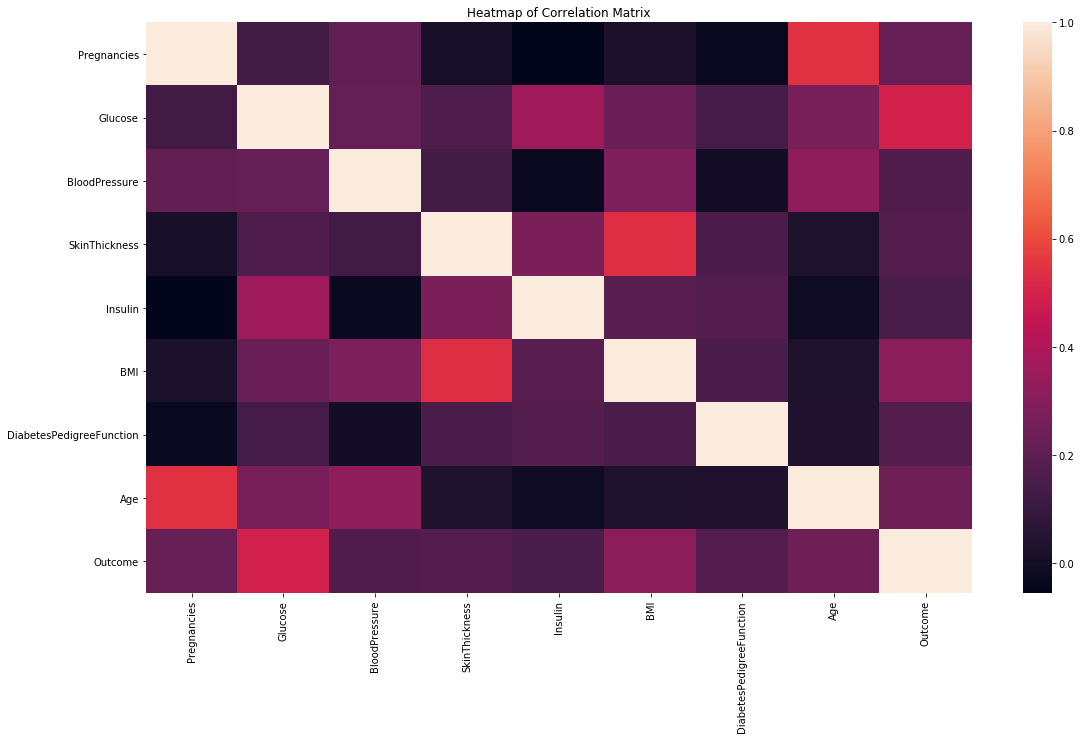

In [21]:
#plotting correlation
fig, ax = plt.subplots()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
fig.set_size_inches(18.5, 10.5)

In [22]:
# splitting the data into test and train sets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

# Create the X and y set
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

Text(0, 0.5, 'Count')

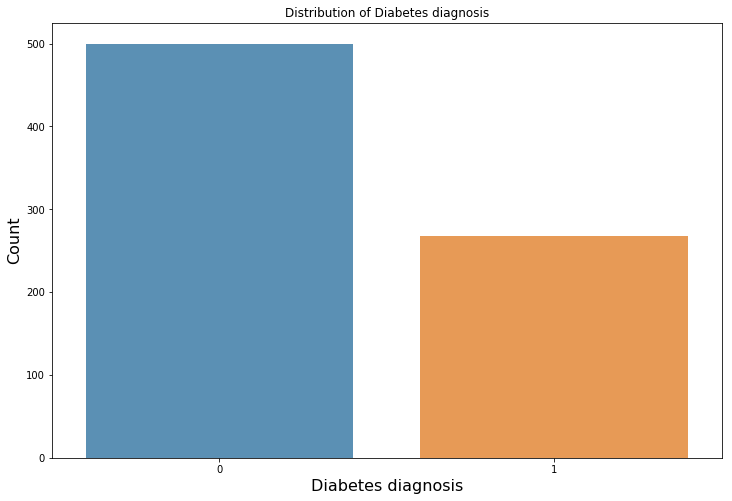

In [23]:
#Checking for Class Imbalance 
plt.figure(figsize=(12,8))
diabetes  = df.Outcome.value_counts()
sns.barplot(y = diabetes.values, x = diabetes.index, alpha = 0.8)
plt.title('Distribution of Diabetes diagnosis')
plt.xlabel('Diabetes diagnosis', fontsize=16)
plt.ylabel('Count', fontsize=16)


# Class Imbalance 

In [24]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 
# Upsample minority class 
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Upsampling using SMOTE
sm = SMOTE(random_state=123)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original shape: (614, 8) (614,)
Upsampled shape: (800, 8) (800,)
SMOTE sample shape: (800, 8) (800,)


In [25]:
# Getting the best sampling method based on the F1 score for each sampling dataset 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and smote sampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm)}

# Loop through each type of training sets and apply 5-Fold CV using Random forest
for method in methods_data.keys():
    rf_results = cross_val_score(RandomForestClassifier(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (rf_results.mean())
 
cross_val_score(RandomForestClassifier(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean()

The best F1 Score for Original data:
0.6060060248570085
The best F1 Score for Upsampled data:
0.8696082982540293
The best F1 Score for SMOTE data:
0.8333043685636012


0.6037221995873996

# Model formulation 

In [26]:
#importing different models to predict if a patient is Diabetic
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
# prepare models to be looped for prediction
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF',RandomForestClassifier()))
models.append(('GB',GradientBoostingClassifier()))

In [28]:
#training the models and making prediction
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn import model_selection
# evaluate each model in turn
results = []
results2 = []
names = []
scoring = make_scorer(mean_squared_error)
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train_u, y_train_u, cv=5, scoring=scoring)
    cv_results_2 = model_selection.cross_val_score(model, X_train_u, y_train_u, cv=5, scoring='accuracy')
    results.append(cv_results)
    results2.append(cv_results_2)
    names.append(name)
    result = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print ("\n\n ---"," ",name, "Model---")
    print(result)
    classifier = model
    classifier = classifier.fit(X_train_u, y_train_u)
    model_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
    print (name, "AUC = %2.2f" % model_roc_auc)
    print(confusion_matrix(y_test, classifier.predict(X_test)))
    print(classification_report(y_test, classifier.predict(X_test)))

C:\Users\sawan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\sawan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\sawan\Anaconda3\lib\site-packages



 ---   LR Model---
LR: 0.280000 (0.014470)
LR AUC = 0.78
[[85 15]
 [16 38]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       100
           1       0.72      0.70      0.71        54

    accuracy                           0.80       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.80      0.80      0.80       154



 ---   LDA Model---
LDA: 0.265000 (0.020387)
LDA AUC = 0.77
[[87 13]
 [18 36]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.73      0.67      0.70        54

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



 ---   KNN Model---
KNN: 0.276250 (0.026634)
KNN AUC = 0.68
[[66 34]
 [16 38]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.73       1

C:\Users\sawan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression





 ---   CART Model---
CART: 0.172500 (0.025495)
CART AUC = 0.71
[[77 23]
 [19 35]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       100
           1       0.60      0.65      0.62        54

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



 ---   NB Model---
NB: 0.288750 (0.029155)
NB AUC = 0.76
[[88 12]
 [19 35]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       100
           1       0.74      0.65      0.69        54

    accuracy                           0.80       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.80      0.80       154



 ---   SVM Model---
SVM: 0.278750 (0.030000)
SVM AUC = 0.74
[[82 18]
 [18 36]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     

Neural Network: Multi Layer Perceptron Model

In [29]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train_u,y_train_u)
predictions = mlp.predict(X_test)

In [30]:
models.append(('MLP',MLPClassifier()))
names.append('MLP')
scoring = make_scorer(mean_squared_error)
r1 = model_selection.cross_val_score(mlp, X_train_u, y_train_u, cv=5, scoring=scoring)
r2 = model_selection.cross_val_score(mlp, X_train_u, y_train_u, cv=5, scoring='accuracy')
results.append(r1)
results2.append(r2)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[80 20]
 [21 33]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [31]:
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu')) 
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
# compile the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
# training the network and iterating in the batch size of 20
model.fit(X_train_u, y_train_u, epochs = 15, batch_size=20, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, batch_size=128)
print(score)
pred = model.predict(X_test)
pred = np.around(pred , decimals = 0)
accuracy_score(pred,y_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 800 samples, validate on 154 samples
Epoch 1/15
800/800 [==============================] - 0s 268us/step - loss: 23.2792 - accuracy: 0.5000 - val_loss: 7.8842 - val_accuracy: 0.6494
Epoch 2/15
800/800 [==============================] - 0s 62us/step - loss: 4.3223 - accuracy: 0.5125 - val_loss: 1.2595 - val_accuracy: 0.5390
Epoch 3/15
800/800 [==============================] - 0s 66us/step - loss: 0.8813 - accuracy: 0.5813 - val_loss: 0.8700 - val_accuracy: 0.5649
Epoch 4/15
800/800 [==============================] - 0s 60us/step - loss: 0.6882 - accuracy: 0.6325 - val_loss: 0.6556 - val_accuracy: 0.6494
Epoch 5/15
800/800 [==============================] - 0s 67us/step - loss: 0.6630 - accuracy: 0.6413 - val_loss: 0.6464 - val_accuracy: 0.6623
Epoch 6/15
800/800 [==============================] - 0s 69us

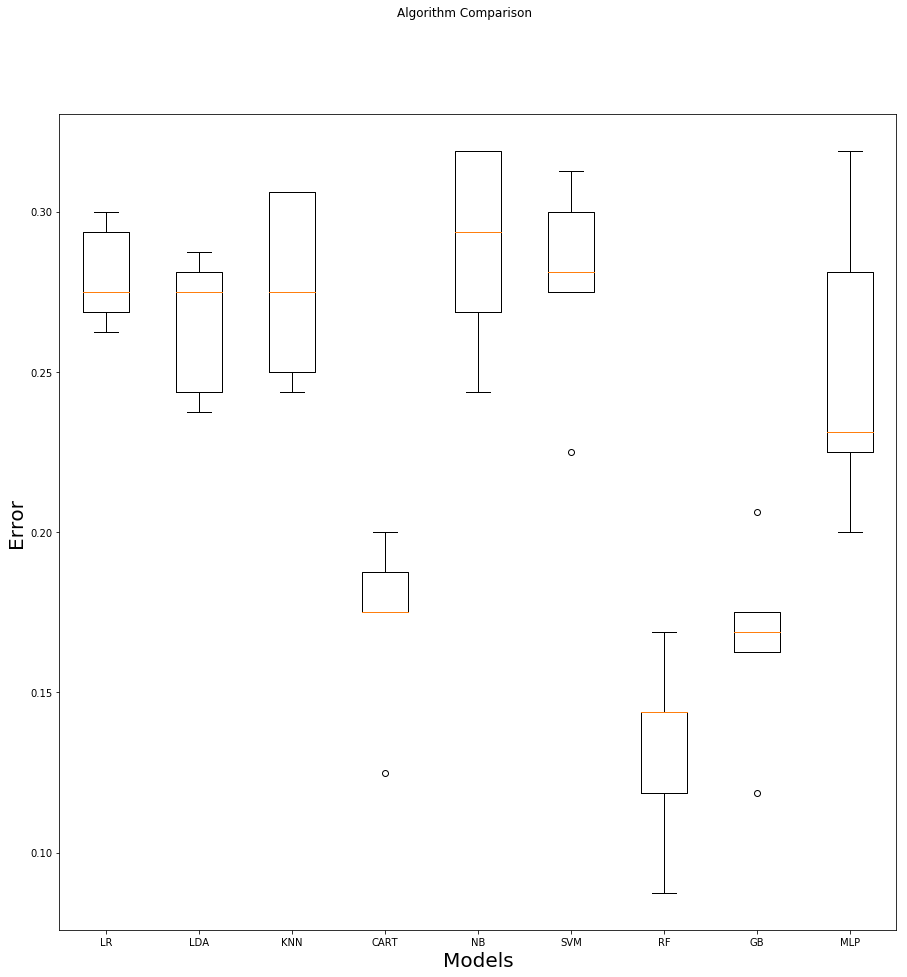

In [32]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
fig.set_size_inches(15, 15)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel('Models',fontsize=20)
plt.ylabel('Error',fontsize=20)
plt.show()

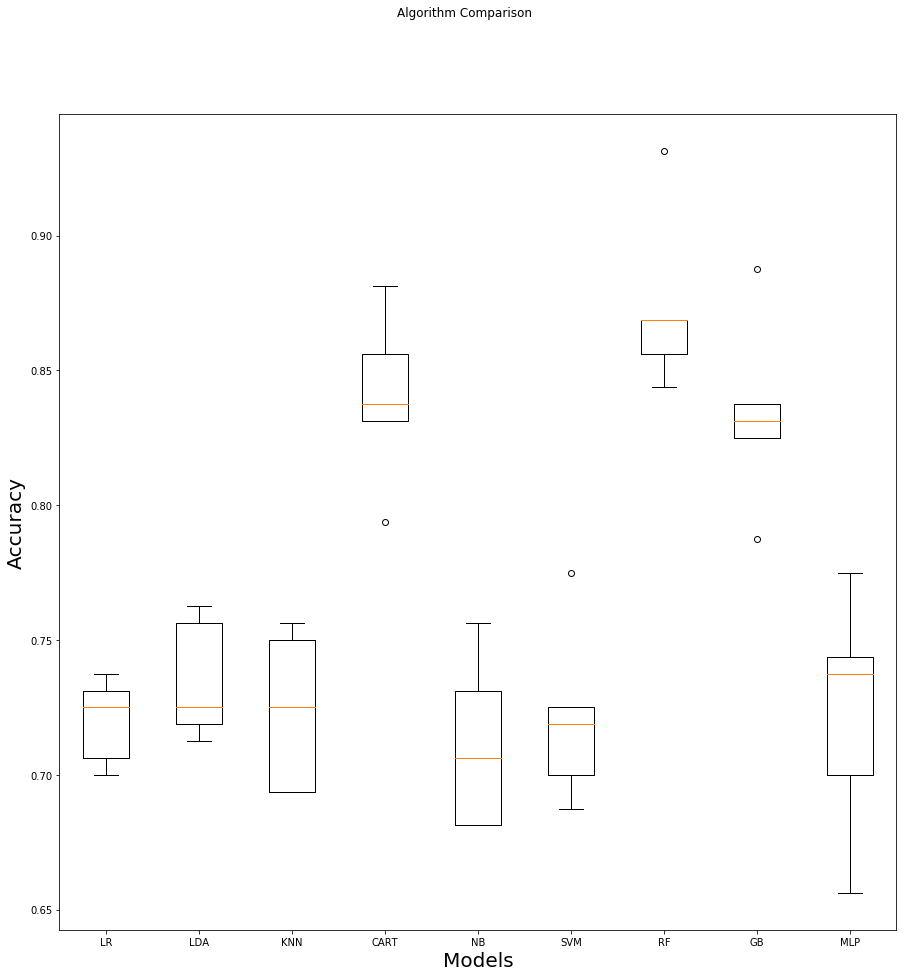

In [33]:
# boxplot algorithm comparison with respect to accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
fig.set_size_inches(15, 15)
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names)
plt.xlabel('Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.show()

# Feature Importance 

In [34]:
# Get Feature Importances
rf = RandomForestClassifier()
rf = rf.fit(X_train_u, y_train_u)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances


index  importance
0                   Glucose    0.237731
1                       BMI    0.172998
2                       Age    0.159292
3  DiabetesPedigreeFunction    0.119932
4             BloodPressure    0.084733
5                   Insulin    0.081399
6             SkinThickness    0.075007
7               Pregnancies    0.068907

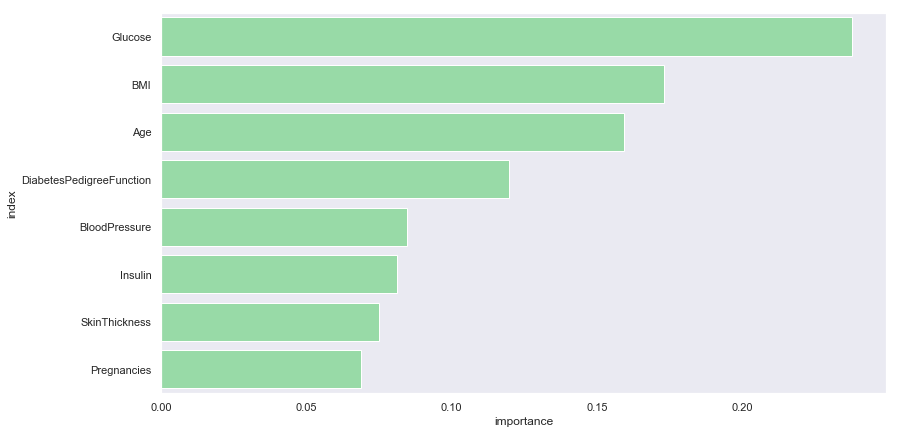

In [35]:
sns.set(style="dark")
# Plot the Feature Importance
f, ax = plt.subplots(figsize=(13, 7))
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="g")

Adding Random Noise to identify most important features

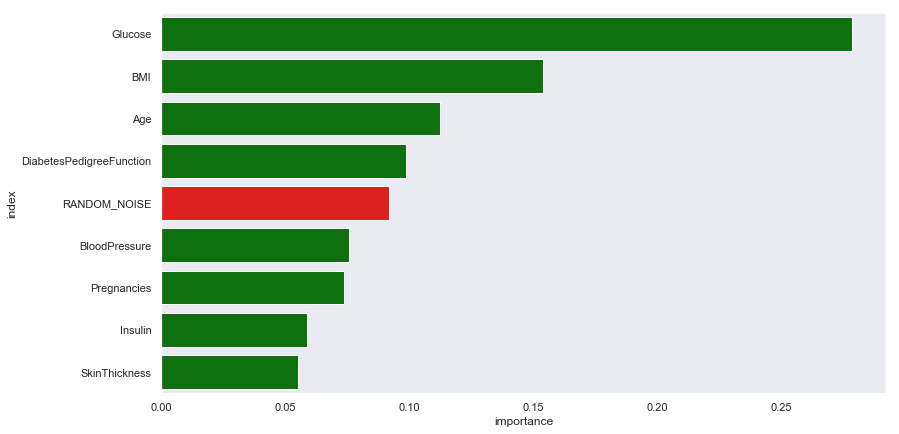

In [36]:
# Apply Random Noise to data set
X_train_rnoise = pd.DataFrame(X_train)
X_train_rnoise['RANDOM_NOISE'] = np.random.normal(0, 1, X_train_rnoise.shape[0])

# Fit Random Forest to DataSet
rf_random = RandomForestClassifier()
rf_random = rf_random.fit(X_train_rnoise, y_train)

# Get Feature Importances
feature_importances_random = pd.DataFrame(rf_random.feature_importances_, index = X_train_rnoise.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances_random = feature_importances_random.reset_index()

# Create Seaborn PLot
sns.set(style="dark")
f, ax = plt.subplots(figsize=(13, 7))
color = ['red' if (x == 4 ) else 'green' for x in feature_importances_random.index.values ]

# Plot the Feature Importance
sns.barplot(x="importance", y='index', data=feature_importances_random,
            label="Total", palette=color)

# Sensitivity Analysis

In [37]:
import random
a = []
sensitivity = []
specificity = []
sensitivity_old = 0
for i in range(0,100):
    a.append(random.randrange(100,900)/1000)
a = sorted(a)
for i in sorted(a):
    # Define train and test
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=i, random_state=123, stratify=y)
    rf = RandomForestClassifier()
    rf = rf.fit(x_train,y_train)
    cm1 = confusion_matrix(y_test, rf.predict(x_test))
    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity.append(sensitivity1 )
    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity.append(specificity1)
    if sensitivity1 > sensitivity_old:
        sensitivity_old = sensitivity1
        optimum_sensitivity = sensitivity1
        optimum_split = i

Text(0, 0.5, 'Sensitivity')

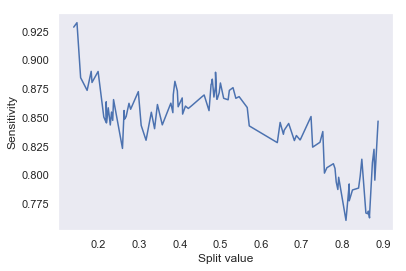

In [38]:
#sensitivity vs test-train split values
plt.plot(a,sensitivity)
plt.xlabel('Split value')
plt.ylabel('Sensitivity')

In [39]:
# getting Highest sensitivity and corresponding optimum test-train split value
print("Highest sensitivity obtained is: ", optimum_sensitivity )
print("corresponding optimum test-train split value is: ", optimum_split)
print(round((1-optimum_split)*100,2),"% is the percentage of data in the training set and ",optimum_split*100,"% is the percentage of data in the test set")

Highest sensitivity obtained is:  0.9324324324324325
corresponding optimum test-train split value is:  0.147
85.3 % is the percentage of data in the training set and  14.7 % is the percentage of data in the test set


# Generating new data for testing

In [40]:
#generating a dataframe with 10 new instances of the features used for prediction
df2 = DataFrame()
for j in df.columns:
    list = []
    for i in range(0,10):
        list.append(np.random.choice(df[j]))
    df2[j] = list
df2

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            4    191.0             70      20.536458     30.5  29.7   
1           10    165.0             88      27.000000     30.5  30.4   
2            3     96.0             74      20.000000     92.0  28.0   
3            6    161.0            108      20.536458     30.5  44.1   
4            1    117.0             70      24.000000    182.0  24.6   
5            3    125.0             96      20.536458     30.5  32.8   
6            2     95.0            108      20.536458    155.0  38.4   
7            0     99.0             72      47.000000     66.0  26.2   
8            2    186.0             74      20.000000    180.0  35.7   
9            0    162.0             92      33.000000     30.5  33.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.658   29        0  
1                     1.213   40        0  
2                     0.738   22        0  
3                     0.403   26        0  
4                     0.173   62        1  
5                     0.343   54        1  
6                     0.542   22        1  
7                     0.839   28        1  
8                     0.238   51        0  
9                     0.197   65        0

In [41]:
# Create the Features and Target set
f = df2.iloc[:,0:8]
t = df2.iloc[:,-1]

In [42]:
rf = RandomForestClassifier()
rf = rf.fit(X_train_u, y_train_u)
pred = rf.predict(f)

In [43]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Actual', 'Predicted']),
                 cells=dict(values=[df2.Outcome, pred]))
                     ])
fig.show()

In [44]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train_u,y_train_u)
predictions = mlp.predict(f)

In [45]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Actual', 'Predicted']),
                 cells=dict(values=[df2.Outcome, predictions]))
                     ])
fig.show()